# Clustering - DBSCAN

- [How DBSCAN works and why should we use it?](https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80)
- [從 DBSCAN 算法談談聚類算法](https://blog.csdn.net/u014688145/article/details/53388649)

數據背後，每個數據樣本都有它們的不確定性。聚類需要滿足兩個條件：

- 第一，類與類之間有一個影響它們本質的 gap，也就是說在 2 維世界中兩堆數據是有一定的間距的。影響間距的本質原因，便是現實世界中影響人們區分這兩類事物的判別依據，只是在數據的坐標軸世界中我們以 distance 來衡量
- 第二，每個類在自己的群體內，有某種微小的不確定性影響著它們的分佈，但不足以跨越那個 gap。即這些微小的不確定性，導致了數據樣本在某個特定的樣本空間附近隨機出現，從而在坐標軸中能夠看到大量數據堆積在一塊。

## DBSCAN 定義

先來看看 DBSCAN 一些關鍵概念的定義： 

1. **ϵ neighborhood** (eps)：給定對象半徑 ϵ 內的區域稱為該對象的 ϵ 鄰域。
2. **minPoints**: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.
2. **core points (核心對象)**: 如果給定對象ϵϵ鄰域內的樣本點數大於等於 MinPts，則稱該對象為核心對象。 
3. **directly density-reachable (直接密度可達)**: 給定一個對象集合 D，如果 p 在 q 的ϵϵ的鄰域內，且 q 是一個核心對象，則我們說對象 p 從對象 q 出發是直接密度可達的。 
4. **density-reachable (密度可達)**：對於樣本集合 D，如果存在一個對象鏈 `P1,P2,...,Pn, P1=q, Pn=pP1,P2,...,Pn, P1=q, Pn=p`，對於 Pi∈D,1≤i≤nPi∈D,1≤i≤n，Pi+1Pi+1是從 Pi 關於 ϵ 和 MinPts 直接密度可達，則對象 p 是從對象 q 關於ϵϵ和 MinPts 密度可達的。 
5. **density-connected (密度相連)**: 如果存在對象 o∈Do∈D，使對象 p 和 q 都是從 o 關於ϵϵ和 MinPts 密度可達的，那麼對象 p 到 q 是關於 ϵ 和 MinPts 密度相連的。

In [5]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
# A校生
mu1, sigma1 = 70, 4.2
x1 = mu1 + sigma1 * np.random.randn(400)

iq_mu1,iq_sigma1 = 120,15 # 學習時間長
iq_mu2,iq_sigma2 = 60,10  # 學習時間短

tmp1 = iq_mu1 + iq_sigma1 * np.random.randn(350)
tmp2 = iq_mu2 + iq_sigma2 * np.random.randn(50)

y1 = np.append(tmp1,tmp2)

# B校生
mu2,sigma2 = 90,2.1
x2 = mu2 + sigma2 * np.random.randn(300)

tmp3 = iq_mu1 + iq_sigma1 * np.random.randn(50)
tmp4 = iq_mu2 + iq_sigma2 * np.random.randn(250)

y2 = np.append(tmp3,tmp4)

# 水平組合
dataset1 = np.column_stack((x1,y1))
dataset2 = np.column_stack((x2,y2))

dataset = np.vstack((dataset1,dataset2))
dataset

array([[ 70.06443349, 136.83385781],
       [ 65.139298  , 104.36545959],
       [ 71.43016248, 149.64532261],
       ...,
       [ 90.2147766 ,  40.88593225],
       [ 89.98146563,  43.98992428],
       [ 89.09174568,  65.04421575]])

### DBSCAN

In [24]:
def dbscan(dataset, EPS, MIN_SANPLES):
    db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES).fit(dataset)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print(f'n_clusters: {n_clusters_}')

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = dataSet[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = dataSet[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

n_clusters: 4


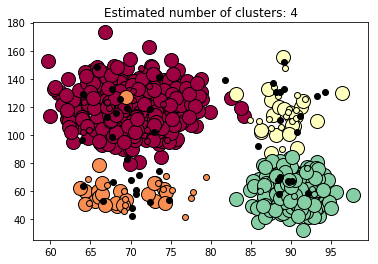

In [25]:
EPS = 5
MIN_SAMPLES = 10
dbscan(dataset, EPS, MIN_SAMPLES)

當ϵ=12和 MinPts =10，得到如下分類圖：

顯然ϵ跨越了 gap，所以導致分類失敗。

n_clusters: 1


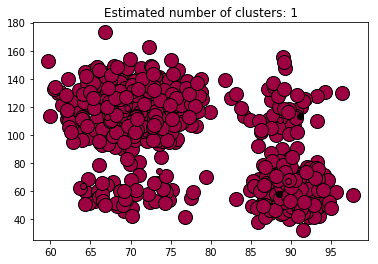

In [26]:
EPS = 12
MIN_SAMPLES = 10
dbscan(dataset, EPS, MIN_SAMPLES)

當ϵ=5和 MinPts =3，得到如下分類圖：

降低鄰域內的樣點數同樣能導致分類失敗。

n_clusters: 8


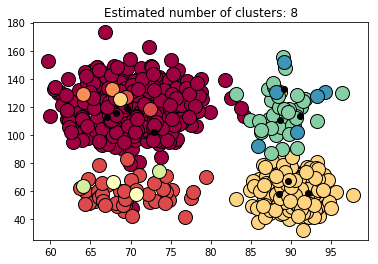

In [32]:
EPS = 5
MIN_SAMPLES = 2
dbscan(dataset, EPS, MIN_SAMPLES)

所以說，DBSCAN 算法很依賴參數的設置，在特定領域參數的設置需要領域專家來完成
To choose good parameters we need to understand how they are used and have at least a basic previous knowledge about the data set that will be used.

- `eps`: if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a **k-distance** graph to find it), but **in general small eps values are preferable**.
- `minPoints`: As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as *`minPoints` ≥ D + 1*.
    - Larger values are usually better for data sets with noise and will form more significant clusters.
    - The minimum value for the minPoints must be 3, but _the larger the data set, the larger the minPoints value that should be chosen_.